In [29]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from scipy.stats import skew
from matplotlib.colors import ListedColormap
import pandas as pd
import matplotlib.patches as mpatches


In [30]:
#make_blobs(n_samples=500, centers=3, n_features=2,random_state=1, cluster_std = 2),

datasets = [
    make_blobs(n_samples=200, centers=[[0,0],[5,0],[5,0],[5,0],[5,0],[5,0]], n_features=5,random_state=1, cluster_std = 1),
    make_blobs(n_samples=200, centers=2, n_features=2,random_state=2, cluster_std = 3),
    make_moons(n_samples=500, noise=0.1, random_state=1),
    make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=[[0,0],[1,0]], n_features=2,random_state=3, cluster_std = 0.3),
    make_blobs(n_samples=100, centers=[[0,0],[3,0]], n_features=2,random_state=3, cluster_std = 0.2),
    make_blobs(n_samples=100, centers=[[0,0],[1,0]], n_features=2,random_state=3, cluster_std = 0.2),
]

NUM = 1
# 5 = thin boundary with classifiers[1]
# 4 = thin boundary with close together groups with classifiers[1]
# 0 = bias
# 1 = bad model as gets errors, but clear boundary


X, y = datasets[NUM]

if NUM == 0:
    y = [0 if val == 0 else 1 for val in y]
# One hot
y = [ [1 if val == 0 else 0, 1 if val == 1 else 0] for val in y]

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )


Text(0, 0.5, 'Y Values')

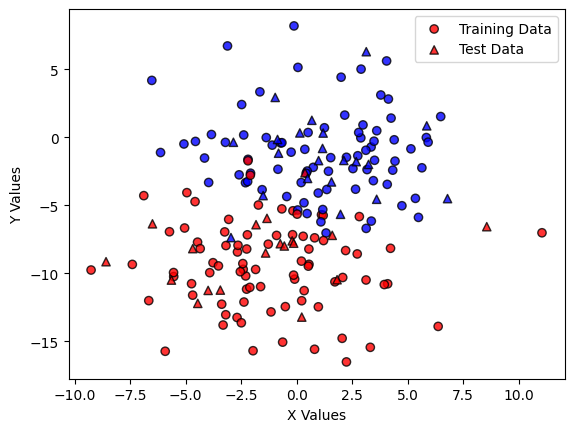

In [31]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = [i[0] for i in y_train], cmap = ListedColormap(['Blue','Red']), alpha = 0.8, edgecolor = "black", label = "Training Data") 
plt.scatter(X_test[:, 0], X_test[:, 1], c = [i[0] for i in y_test], cmap = ListedColormap(['Blue','Red']), alpha = 0.8, edgecolor = "black", label = "Test Data", marker = "^")
plt.legend()
plt.xlabel("X Values")
plt.ylabel("Y Values")

In [32]:
#classifier = MLPClassifier()
classifiers = [MLPClassifier(learning_rate_init = 10),
            RandomForestClassifier(),
            DecisionTreeClassifier(),
            KNeighborsClassifier(),]
classifier_names = ["MLP CLassifier", "Random Forest Classifier", "Decision Tree Classifier", "K Neighbors Classifier",]

In [33]:
model = classifiers[1]
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
basic_results = model.predict_proba(X_test)


In [35]:
initial_df = pd.DataFrame()
initial_df["class_0"] = [label[0] for label in y_test]
initial_df["coords_index"] = [i for i in range(len(X_test))]
initial_df["confidence"] = [alpha[0] for alpha in basic_results[0]]

In [36]:
import random

muba_df = pd.DataFrame(columns = ["class_0_confidence",
                    "class_1_confidence",
                    "alpha_0",
                    "coords",
                    "y_value",
    ])

MUBA_ITERS = 20

class_zero_df = pd.DataFrame()
class_one_df = pd.DataFrame()
class_zero_df = initial_df[initial_df["class_0"] == 1]
class_one_df = initial_df[initial_df["class_0"] == 0]

# Get MUBA data
X_muba = []
y_muba = []
alphas = []

for index0, row0 in class_zero_df.iterrows():
    
    for index1, row1 in class_one_df.iterrows():

        for i in range(MUBA_ITERS):

            # Mixup 
            lam = (1/MUBA_ITERS) * np.random.rand() + ( (i) / MUBA_ITERS)

            new_coords = lam * X_test[int(row0["coords_index"])] + (1-lam) * X_test[int(row1["coords_index"])]
            #print(new_coords)

            row = pd.DataFrame({"class_0_confidence": row0["confidence"],
                    "class_1_confidence": row1["confidence"],
                    "alpha_0": lam,
                    "coords": [new_coords],
                    "y_value": (row0["confidence"] - row1["confidence"]) * (lam) + row1["confidence"],
    
                    })
            
            muba_df = pd.concat([muba_df, pd.DataFrame(row)], axis=0, ignore_index = True)
            


In [37]:
muba_df

,class_0_confidence,class_1_confidence,alpha_0,coords,y_value
0,0.02,0.95,0.042500,"[2.5359029037915812, -2.0435771035748185]",0.910475
1,0.02,0.95,0.071243,"[2.437597450077261, -2.217039003066371]",0.883744
2,0.02,0.95,0.105303,"[2.321106593834365, -2.422589401684253]",0.852068
3,0.02,0.95,0.184829,"[2.0491161120848016, -2.902521936709307]",0.778109
4,0.02,0.95,0.245542,"[1.8414724619241523, -3.2689132264427974]",0.721646
...,...,...,...,...,...
7975,0.00,0.68,0.790801,"[-4.016506992488734, -7.366788700281629]",0.142255
7976,0.00,0.68,0.821366,"[-4.113374375855077, -7.485924684196342]",0.121471
7977,0.00,0.68,0.889368,"[-4.328887030802401, -7.750981004507177]",0.075230
7978,0.00,0.68,0.902113,"[-4.369276684430553, -7.8006557346149]",0.066563


(array([400., 400., 398., 400., 399., 399., 398., 401., 396., 399., 400.,
        398., 400., 399., 398., 401., 397., 399., 399., 399.]),
 array([2.13945699e-04, 5.02031703e-02, 1.00192395e-01, 1.50181620e-01,
        2.00170844e-01, 2.50160069e-01, 3.00149294e-01, 3.50138518e-01,
        4.00127743e-01, 4.50116968e-01, 5.00106192e-01, 5.50095417e-01,
        6.00084642e-01, 6.50073866e-01, 7.00063091e-01, 7.50052315e-01,
        8.00041540e-01, 8.50030765e-01, 9.00019989e-01, 9.50009214e-01,
        9.99998439e-01]),
 <BarContainer object of 20 artists>)

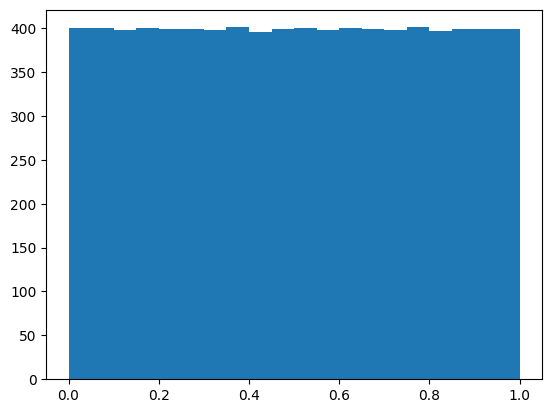

In [38]:
plt.hist(muba_df["alpha_0"], bins = 20)

In [39]:
# Get Predictions

result = model.predict([c for c in muba_df["coords"]])
pred_zero_array = [res[0] for res in result] # 1 if cluster 0


In [40]:
analysis_df = muba_df.copy(deep = True)

predictions = pd.DataFrame()
predictions["pred_zero"] = pred_zero_array

# Merge on predictions
analysis_df = analysis_df.join(predictions)
boundary_df = pd.DataFrame(columns = ["alpha","y"])

for i in range(int(len(analysis_df)/MUBA_ITERS)):
    # Create a mask to split df in to blocks of 20
    mask = (analysis_df.index >= MUBA_ITERS*i) & (analysis_df.index < MUBA_ITERS*i + MUBA_ITERS)
    window_df = analysis_df.loc[mask]
    # Find the index in which the prediction changes
    changing_pred_index = (window_df["pred_zero"].diff()[window_df["pred_zero"].diff() != 0].index.values)
    
    if len(changing_pred_index) > 2:
        print(window_df)
        print(changing_pred_index)

    for boundary in changing_pred_index[1:]: # If pred doesn't change will equal 1
        row0 = window_df[window_df.index == boundary-1]
        row1 = window_df[window_df.index == boundary]
        middle_alpha = (row1["alpha_0"][boundary] + row0["alpha_0"][boundary-1]) / 2
        middle_y = row0["y_value"][boundary-1] + ( (row1["y_value"][boundary] - row0["y_value"][boundary-1]) / 2 )
        middle_coords = (row0["coords"][boundary-1] + row1["coords"][boundary])/2
        new_row = pd.DataFrame({
            "alpha":[middle_alpha],
            "y":[middle_y],
            "middle_coords":[middle_coords]
        })
        boundary_df = pd.concat([boundary_df,new_row], axis=0, ignore_index = True)

    class_0_confidence  class_1_confidence   alpha_0  \
0                 0.02                0.95  0.042500   
1                 0.02                0.95  0.071243   
2                 0.02                0.95  0.105303   
3                 0.02                0.95  0.184829   
4                 0.02                0.95  0.245542   
5                 0.02                0.95  0.292104   
6                 0.02                0.95  0.319555   
7                 0.02                0.95  0.380395   
8                 0.02                0.95  0.435988   
9                 0.02                0.95  0.490367   
10                0.02                0.95  0.549686   
11                0.02                0.95  0.555032   
12                0.02                0.95  0.619473   
13                0.02                0.95  0.670826   
14                0.02                0.95  0.708655   
15                0.02                0.95  0.753284   
16                0.02                0.95  0.83

In [41]:
incorrect_alphas = []
for i, row in analysis_df.iterrows():
    if pred_zero_array[i] != round(row["alpha_0"]): #if 1, it is class 0
        incorrect_alphas.append(row["alpha_0"])

(0.0, 1.0)

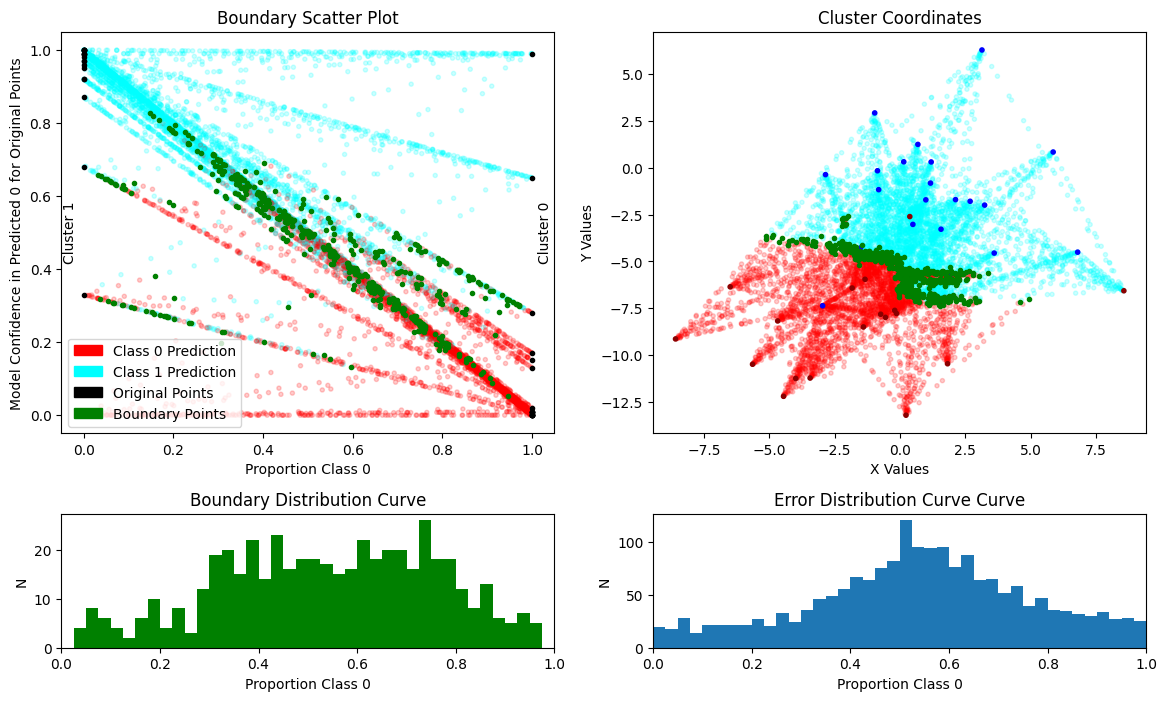

In [42]:
import matplotlib.patches as mpatches


fig, ax = plt.subplots(2,2,gridspec_kw={'height_ratios': [3, 1]}, figsize = (14,8))
fig.subplots_adjust(hspace=0.3)

ax[0][0].scatter(muba_df["alpha_0"],muba_df["y_value"], marker = ".", alpha = 0.2, color = ["red" if x == 1 else "aqua" for x in predictions["pred_zero"]], label = "Mixup Images")
ax[0][0].scatter(initial_df["class_0"],initial_df["confidence"], marker = ".", color = "black", label = "True Images")
ax[0][0].scatter(boundary_df["alpha"],boundary_df["y"], marker = ".", color = "green")
ax[0][0].set_ylim([-0.05,1.05])

# Create a legend with a color box
no_patch = mpatches.Patch(color='red', label='Class 0 Prediction')
yes_patch = mpatches.Patch(color='aqua', label='Class 1 Prediction')
original_patch = mpatches.Patch(color='black', label='Original Points')
middle_patch = mpatches.Patch(color='green', label='Boundary Points')

ax[0][0].legend(handles=[no_patch, yes_patch, original_patch, middle_patch])

ax[0][0].set_title("Boundary Scatter Plot")
ax[0][1].set_title("Cluster Coordinates")
ax[1][0].set_xlabel("Proportion Class 0")
ax[1][1].set_xlabel("Proportion Class 0")
ax[0][0].set_xlabel("Proportion Class 0")
ax[1][0].set_ylabel("N")
ax[1][1].set_ylabel("N")
ax[1][0].set_title("Boundary Distribution Curve")
ax[0][0].set_ylabel("Model Confidence in Predicted 0 for Original Points")
ax[0][1].set_xlabel("X Values")
ax[0][1].set_ylabel("Y Values")
ax[0][0].text(-0.03,0.5,"Cluster 1", rotation = "vertical", va = "center", ha = "center")
ax[0][0].text(1.03,0.5,"Cluster 0", rotation = "vertical", va = "center", ha = "center")

# ax.axis("off")
ax[1][0].hist(boundary_df["alpha"],bins=[0.025 * i for i in range(41)],color="green")

x = [coord[0] for coord in muba_df["coords"]]
y = [coord[1] for coord in muba_df["coords"]]
ax[0][1].scatter(x,y, color = ["red" if x == 1 else "aqua" for x in predictions["pred_zero"]],marker = ".", alpha = 0.2)
ax[0][1].scatter([X_test[int(i)][0] for i in initial_df["coords_index"]],[X_test[int(i)][1] for i in initial_df["coords_index"]], marker = ".", c = ["DarkRed" if x == 1 else "blue" for x in initial_df["class_0"]], label = "True Images")
ax[0][1].scatter([c[0] for c in boundary_df["middle_coords"]],[c[1] for c in boundary_df["middle_coords"]], marker = ".", color = "green")

ax[1][1].hist(incorrect_alphas, bins=[0.025 * i for i in range(41)])
ax[1][1].set_title("Error Distribution Curve Curve")

ax[1][1].set_xlim(0,1)
ax[1][0].set_xlim(0,1)